# Worldwide Natural Disasters from 1900 - 2021
---
Initial exploration and cleaning to get tropical storms in the US.

In [1]:
import pandas as pd 
import re
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  

import plotly.express as px
import os

df = pd.read_csv('data/disasters_1900_2021.csv')

#drop columns
df.drop(['Seq', 'Glide', 'Origin', 'Appeal', 'Declaration', 'Aid Contribution', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)"], axis=1, inplace=True)


print(df)

       Year Disaster Group Disaster Subgroup      Disaster Type  \
0      1900        Natural    Climatological            Drought   
1      1900        Natural    Climatological            Drought   
2      1902        Natural       Geophysical         Earthquake   
3      1902        Natural       Geophysical  Volcanic activity   
4      1902        Natural       Geophysical  Volcanic activity   
...     ...            ...               ...                ...   
16121  2021        Natural      Hydrological              Flood   
16122  2021        Natural      Hydrological              Flood   
16123  2021        Natural        Biological           Epidemic   
16124  2021        Natural      Hydrological              Flood   
16125  2021        Natural      Hydrological              Flood   

      Disaster Subtype Disaster Subsubtype   Event Name  \
0              Drought                 NaN          NaN   
1              Drought                 NaN          NaN   
2      Ground move

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      16126 non-null  int64  
 1   Disaster Group            16126 non-null  object 
 2   Disaster Subgroup         16126 non-null  object 
 3   Disaster Type             16126 non-null  object 
 4   Disaster Subtype          13016 non-null  object 
 5   Disaster Subsubtype       1077 non-null   object 
 6   Event Name                3861 non-null   object 
 7   Country                   16126 non-null  object 
 8   ISO                       16126 non-null  object 
 9   Region                    16126 non-null  object 
 10  Continent                 16126 non-null  object 
 11  Location                  14334 non-null  object 
 12  Dis Mag Value             4946 non-null   float64
 13  Dis Mag Scale             14936 non-null  object 
 14  Start 

In [3]:
df.head()

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,...,Dis Mag Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Damages ('000 US$),CPI
0,1900,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,...,Km2,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,3.221647
1,1900,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,Southern Asia,...,Km2,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,3.221647
2,1902,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,Central America,...,Richter,1902,4.0,18.0,1902,4.0,18.0,2000.0,25000.0,3.350513
3,1902,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,...,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,3.350513
4,1902,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,...,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,3.350513


In [4]:
unique_subgroup = df['Disaster Subgroup'].unique()
print(unique_subgroup)

['Climatological' 'Geophysical' 'Meteorological' 'Hydrological'
 'Biological' 'Extra-terrestrial']


In [5]:
storm_df = df[(df['Disaster Subtype'] == 'Tropical cyclone')].copy()

print(storm_df)

       Year Disaster Group Disaster Subgroup Disaster Type  Disaster Subtype  \
7      1904        Natural    Meteorological         Storm  Tropical cyclone   
14     1906        Natural    Meteorological         Storm  Tropical cyclone   
18     1909        Natural    Meteorological         Storm  Tropical cyclone   
19     1909        Natural    Meteorological         Storm  Tropical cyclone   
22     1909        Natural    Meteorological         Storm  Tropical cyclone   
...     ...            ...               ...           ...               ...   
16094  2021        Natural    Meteorological         Storm  Tropical cyclone   
16095  2021        Natural    Meteorological         Storm  Tropical cyclone   
16096  2021        Natural    Meteorological         Storm  Tropical cyclone   
16115  2021        Natural    Meteorological         Storm  Tropical cyclone   
16119  2021        Natural    Meteorological         Storm  Tropical cyclone   

      Disaster Subsubtype              

In [6]:

# Drop the 'Region' column from the DataFrame to prevent conflict with merges to other data
storm_df_dropped = storm_df.drop('Region', axis=1)

# Filter the DataFrame for rows where 'ISO' equals 'USA' and make a copy
us_storms = storm_df_dropped[storm_df_dropped['ISO'] == 'USA'].copy()

print(us_storms)

# Save the DataFrame to a CSV file
us_storms.to_csv('data/us_storms.csv', index=False)

       Year Disaster Group Disaster Subgroup Disaster Type  Disaster Subtype  \
845    1900        Natural    Meteorological         Storm  Tropical cyclone   
866    1906        Natural    Meteorological         Storm  Tropical cyclone   
867    1906        Natural    Meteorological         Storm  Tropical cyclone   
875    1909        Natural    Meteorological         Storm  Tropical cyclone   
876    1909        Natural    Meteorological         Storm  Tropical cyclone   
...     ...            ...               ...           ...               ...   
16048  2020        Natural    Meteorological         Storm  Tropical cyclone   
16049  2020        Natural    Meteorological         Storm  Tropical cyclone   
16091  2021        Natural    Meteorological         Storm  Tropical cyclone   
16092  2021        Natural    Meteorological         Storm  Tropical cyclone   
16093  2021        Natural    Meteorological         Storm  Tropical cyclone   

      Disaster Subsubtype              

In [7]:
us_storms = storm_df[storm_df['ISO'] == 'USA'].copy()

In [8]:
us_storms['Location'].unique()

array(['Galveston (Texas)', 'Florida', 'Mississippi, Alabama, Pensacola',
       'Grand Isle (Louisiana)', 'Velasco (Texas)',
       'Cavelston (Texas), New Orleans (Louisiana)',
       'Louisiana (Southwest)', 'Florida Keys, South Texas', 'Louisiana',
       'Florida, Alabama, Pensacola', 'Lake Okeechobee (Florida)',
       'Freeport (Texas)', 'South Texas', 'New York',
       'Georgia, Carolinas', 'East coast', 'Florida, Louisiana',
       'East Coast', 'South Carolina, North Carolina', nan,
       'Connie (North Carolina)', 'Gulf Coast', 'Texas',
       'Florida, Louisiana, Alabama, Mississippi',
       'Mississippi, Louisiana, Virginia', 'East', 'Gulf coast',
       'Texas, Louisiana', 'Kalamazoo', 'Nebraska', 'Hawaii',
       'Florida, Panhandle, Georgia',
       'Florida, Arkansas, Kentucky, South Dakota, Iowa, Michgigan, Indianapolis, Missouri',
       'Louisiana, Mississippi, Florida Panhandle', 'Colorado, Texas',
       'Floride', 'South Caroline', 'Texas, Louisiane',
       '

### Filter us_storms for regions

In [9]:
from categorizeregion import state_map

def extract_states(location):
     region_abbreviations = {
        'East Coast': 'East Coast',
        'West Coast': 'West Coast',
        'Gulf Coast': 'Gulf Coast',
    }
     if not isinstance(location, str):
        return ''
    
         # Regular expression for recognized regions
    region_pattern = r'\b(?:' + '|'.join(re.escape(region) for region in region_abbreviations) + r')\b'
    
    # First, check if the location matches any of the recognized regions
    found_regions = re.findall(region_pattern, location, re.IGNORECASE)
    if found_regions:
        # Assuming only one region can be mentioned in the location, return the first match
        return region_abbreviations[found_regions[0].title()]
    
    # Continue with state extraction if no recognized region is found
    if not isinstance(location, str):
        return ''
    # Check if the location is a string; if not, return an empty string or None
    if not isinstance(location, str): return ''
    # Regular expression to match state names or abbreviations in various contexts
    pattern = r'\b(?:' + '|'.join(re.escape(s) for s in state_map.keys()) + r')\b'
    
    # Find all matches in the location string
    found_states = re.findall(pattern, location, re.IGNORECASE)
    
    # Convert state names to their abbreviations
    state_abbrs = set()  # Use a set to avoid duplicates
    for state in found_states:
        # Handle case sensitivity and partial matches
        state_title = state.title()  # Ensure the first letter of each word is uppercase
        if state_title in state_map:
            state_abbrs.add(state_map[state_title])
    
    return ', '.join(sorted(state_abbrs))  # Return a string of unique, sorted abbreviations

# Test the function
location_examples = ['Galveston (Texas)', 'Gainesville (Georgia)', 'Florida',
                     'Mississippi, Alabama, Pensacola', 'Grand Isle (Lousiana)',
                     'Velasco (Texas)', 'Ohio, Indiana, Texas']

# Optionally, add more examples to the list
additional_examples = ['East Coast', 'Some city (West Coast)', 'A town in the Gulf Coast region']
location_examples += additional_examples  # This appends the additional examples

# Assuming the extract_states function is already defined and ready to use
# (Make sure to define it in your script or notebook if you haven't)

# Test the function with the defined examples
for loc in location_examples:
    print(f"{loc} -> {extract_states(loc)}")
    


Galveston (Texas) -> TX
Gainesville (Georgia) -> GA
Florida -> FL
Mississippi, Alabama, Pensacola -> AL, FL, MS
Grand Isle (Lousiana) -> 
Velasco (Texas) -> TX
Ohio, Indiana, Texas -> IN, OH, TX
East Coast -> East Coast
Some city (West Coast) -> West Coast
A town in the Gulf Coast region -> Gulf Coast


In [10]:
us_storms['State'] = us_storms['Location'].apply(extract_states)
print(us_storms)


       Year Disaster Group Disaster Subgroup Disaster Type  Disaster Subtype  \
845    1900        Natural    Meteorological         Storm  Tropical cyclone   
866    1906        Natural    Meteorological         Storm  Tropical cyclone   
867    1906        Natural    Meteorological         Storm  Tropical cyclone   
875    1909        Natural    Meteorological         Storm  Tropical cyclone   
876    1909        Natural    Meteorological         Storm  Tropical cyclone   
...     ...            ...               ...           ...               ...   
16048  2020        Natural    Meteorological         Storm  Tropical cyclone   
16049  2020        Natural    Meteorological         Storm  Tropical cyclone   
16091  2021        Natural    Meteorological         Storm  Tropical cyclone   
16092  2021        Natural    Meteorological         Storm  Tropical cyclone   
16093  2021        Natural    Meteorological         Storm  Tropical cyclone   

      Disaster Subsubtype              

In [11]:
print(us_storms[['Location', 'State']].head(10))



                                       Location       State
845                           Galveston (Texas)          TX
866                                     Florida          FL
867             Mississippi, Alabama, Pensacola  AL, FL, MS
875                      Grand Isle (Louisiana)          LA
876                             Velasco (Texas)          TX
883                                     Florida          FL
899  Cavelston (Texas), New Orleans (Louisiana)      LA, TX
906                       Louisiana (Southwest)          LA
908                   Florida Keys, South Texas      FL, TX
930                                   Louisiana          LA


In [12]:
usstorms = us_storms.copy()

In [13]:
from categorizeregion import add_region_column

us_storms = add_region_column(us_storms)

us_storms.to_excel('data/cleanusstorms.xlsx', index=False)
print(us_storms['Region'].value_counts())


Region
Gulf Coast    90
East Coast    26
Other         13
Island         2
West Coast     1
Name: count, dtype: int64


### Follow up later
---
###### Look at regions and consider how to handle storms that impact multiple areas
---

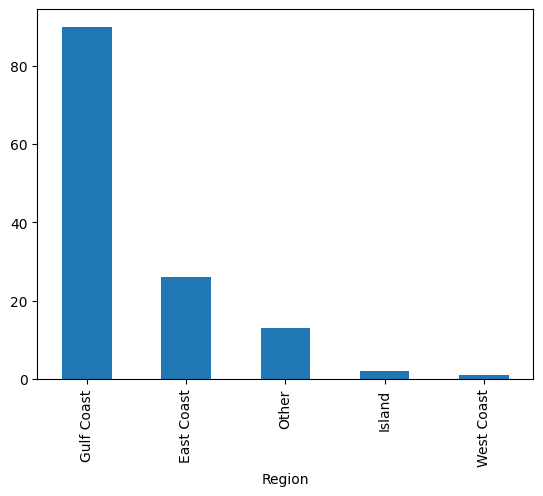